# **Proyecto Final (Análisis bivariado)**
# ![](https://i.gifer.com/7ARb.gif)
Alumnos: Analía López, Alejando Gonzáles, Estéban Nesci, Rodrigo Robert

Curso: Data Science

Comisión: 29720

In [ ]:
# Paquete de instalación para librerías que son una alternativa a pandas profiling

#!pip3 install -U scikit-learn --upgrade # necesitamos sklearn >= 0.24
#!pip install sweetviz
#!pip install ipywidgets # puede ser necesario si lo corren local
#!pip install scikit-optimize

In [ ]:
# Importamos librerias y dependencias

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns  

In [ ]:
# Creamos el dataframe

df = pd.read_csv('/work/20220508_hepatitis.csv', low_memory=False)

**Visualización de las caracateristicas principales del df**

In [ ]:
#Vizualizamos filas y columnas de df

df.shape

print('Este dataset tiene ' + str(df.shape[0]) + ' filas, y ' + str(df.shape[1]) + ' columnas.')

Este dataset tiene 50002 filas, y 36 columnas.


In [ ]:
# Visualizamos info (columnas, tipos de datos, filas y nulls)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               50002 non-null  int64  
 1   conversation_id  50002 non-null  int64  
 2   created_at       50002 non-null  object 
 3   date             50002 non-null  object 
 4   time             50002 non-null  object 
 5   timezone         50002 non-null  int64  
 6   user_id          50002 non-null  int64  
 7   username         50002 non-null  object 
 8   name             50001 non-null  object 
 9   place            34 non-null     object 
 10  tweet            50002 non-null  object 
 11  language         50002 non-null  object 
 12  mentions         50002 non-null  object 
 13  urls             50002 non-null  object 
 14  photos           50002 non-null  object 
 15  replies_count    50002 non-null  int64  
 16  retweets_count   50002 non-null  int64  
 17  likes_count 

In [ ]:
#Vemos una muestra de df

df.head(3)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1523479063272525824,1523479063272525824,2022-05-08 22:44:48 -03,2022-05-08,22:44:48,-300,49024508,onionweigher,Onion Weigher 🧅⚖️,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1523479009694158848,1523418175878037504,2022-05-08 22:44:35 -03,2022-05-08,22:44:35,-300,2726837169,griffinjones25,GJ,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'stargazeruk7', 'name': 'Nata...",NaN,NaN,NaN,NaN
2,1523478947115139072,1523478947115139072,2022-05-08 22:44:20 -03,2022-05-08,22:44:20,-300,1452730505787551750,ideallyanews,IdeallyaNews,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
# A los fines exclusivos de este trabajo eliminamos columnas con datos nulos

df.dropna(axis = 1, inplace=True)

In [ ]:
# Comprobación del cleaning

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               50002 non-null  int64 
 1   conversation_id  50002 non-null  int64 
 2   created_at       50002 non-null  object
 3   date             50002 non-null  object
 4   time             50002 non-null  object
 5   timezone         50002 non-null  int64 
 6   user_id          50002 non-null  int64 
 7   username         50002 non-null  object
 8   tweet            50002 non-null  object
 9   language         50002 non-null  object
 10  mentions         50002 non-null  object
 11  urls             50002 non-null  object
 12  photos           50002 non-null  object
 13  replies_count    50002 non-null  int64 
 14  retweets_count   50002 non-null  int64 
 15  likes_count      50002 non-null  int64 
 16  hashtags         50002 non-null  object
 17  cashtags         50002 non-null

In [ ]:
#Visualizamos datos estadisiticos de las variables numéricas

df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,50002.0,1.522054e+18,8.034588e+14,1.520368e+18,1.521440e+18,1.522193e+18,1.522688e+18,1.523479e+18
conversation_id,50002.0,1.521547e+18,1.256703e+16,2.862209e+17,1.521366e+18,1.522162e+18,1.522656e+18,1.523479e+18
timezone,50002.0,-3.000000e+02,0.000000e+00,-3.000000e+02,-3.000000e+02,-3.000000e+02,-3.000000e+02,-3.000000e+02
user_id,50002.0,5.999266e+17,6.420997e+17,3.832000e+03,2.367702e+08,3.350943e+09,1.290403e+18,1.523235e+18
replies_count,50002.0,9.941802e-01,1.121533e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.318000e+03
retweets_count,50002.0,6.148414e+00,2.065350e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.831000e+04
likes_count,50002.0,1.947836e+01,5.992171e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,7.835400e+04
video,50002.0,1.500340e-01,3.571083e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [ ]:
# sweetviz es un paquete de análisis exploratorio automático, una alternativa a pandas-profiling
import sweetviz as sv

#analyzaremos el dataset
advert_report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
# El siguiente comando escribe un html con una serie de gráficos.
# Además, intenta abrir una pestaña nueva.
# Si ésto no sucede entonces deberán ejecutar manualmente el archivo.
# Para eso, si están en Google Colab deberán descargar el archivo
# y luego darle doble clic al archivo en su computadora.

advert_report.show_html('df.html')

Report df.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


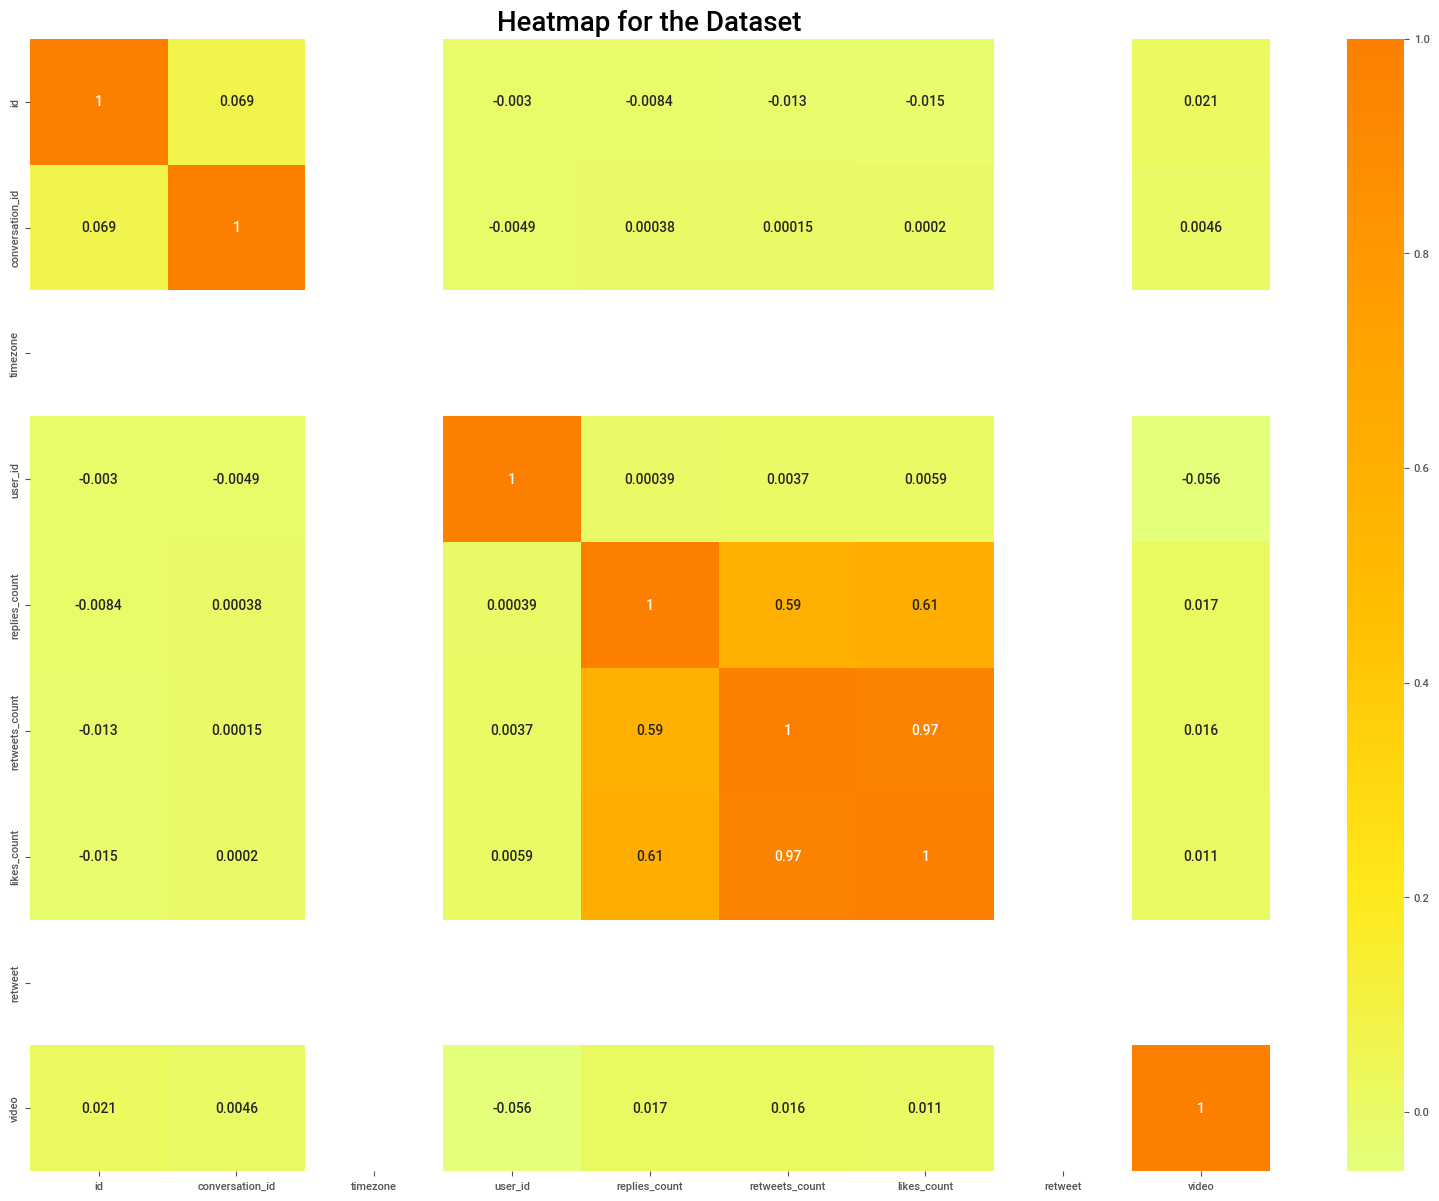

In [ ]:
#Hagamos un HeatMap del df para visualizar correlaciones

plt.rcParams['figure.figsize'] = (20, 15)

sns.heatmap(df.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

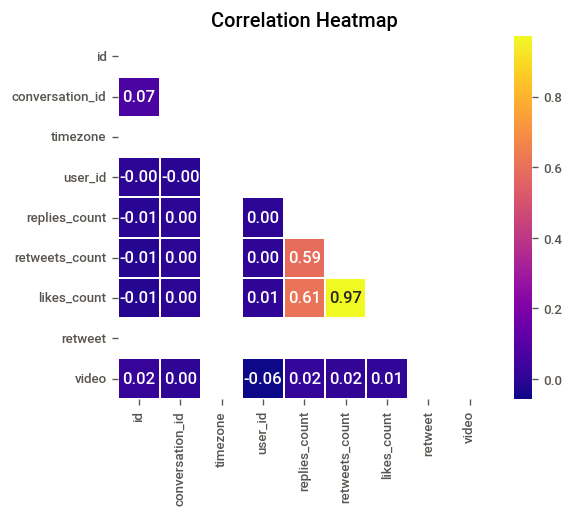

In [ ]:
#Correlaciones según la matriz con mascara

plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Visualizamos columnas para trabajar con ellas

df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'tweet', 'language', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'video', 'reply_to'],
      dtype='object')

In [ ]:
#Visualizaremos un scaterplot con la variables más correlacionadas
#Por cuestiones de memoria vamos a trabajar con las 3 columnas más correlacionadas
#y, además con un sample del 5%

corr = df[['replies_count', 'retweets_count', 'likes_count']]

In [ ]:
# Sampleamos el 5% aleatorio

corr = corr.sample(frac=0.05)

In [ ]:
# verificamos el sample

corr.shape

print('Este dataset tiene ' + str(corr.shape[0]) + ' filas, y ' + str(corr.shape[1]) + ' columnas.')

Este dataset tiene 2500 filas, y 3 columnas.


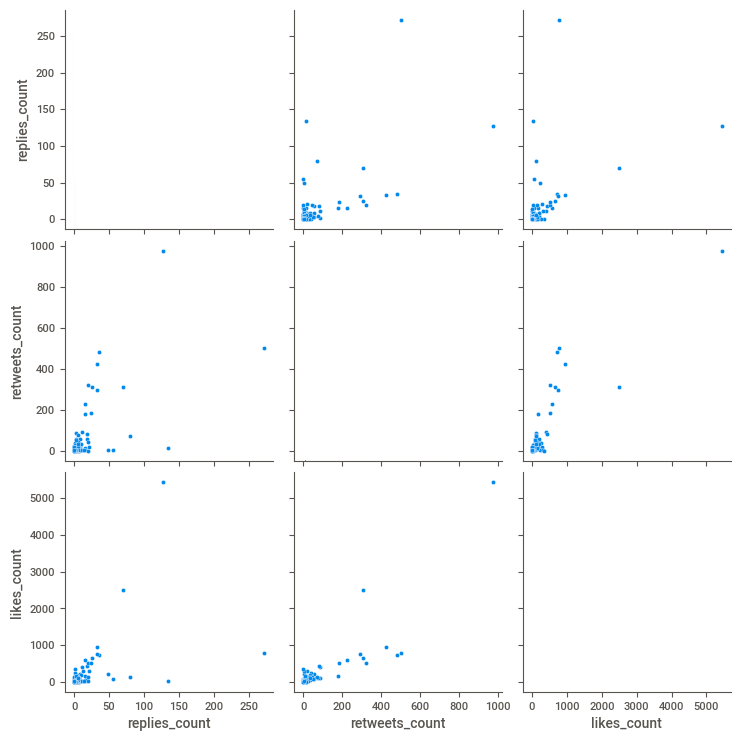

In [ ]:
# Graficamos

sns.pairplot(corr) 
plt.show() 
#sns.pairplot(df , size = 3 , palette = 'Set2')

Graficamos algunos pares de variables para visualizar mejor:

Text(0.5, 1.0, 'Relacion entre Likes y Retweets')

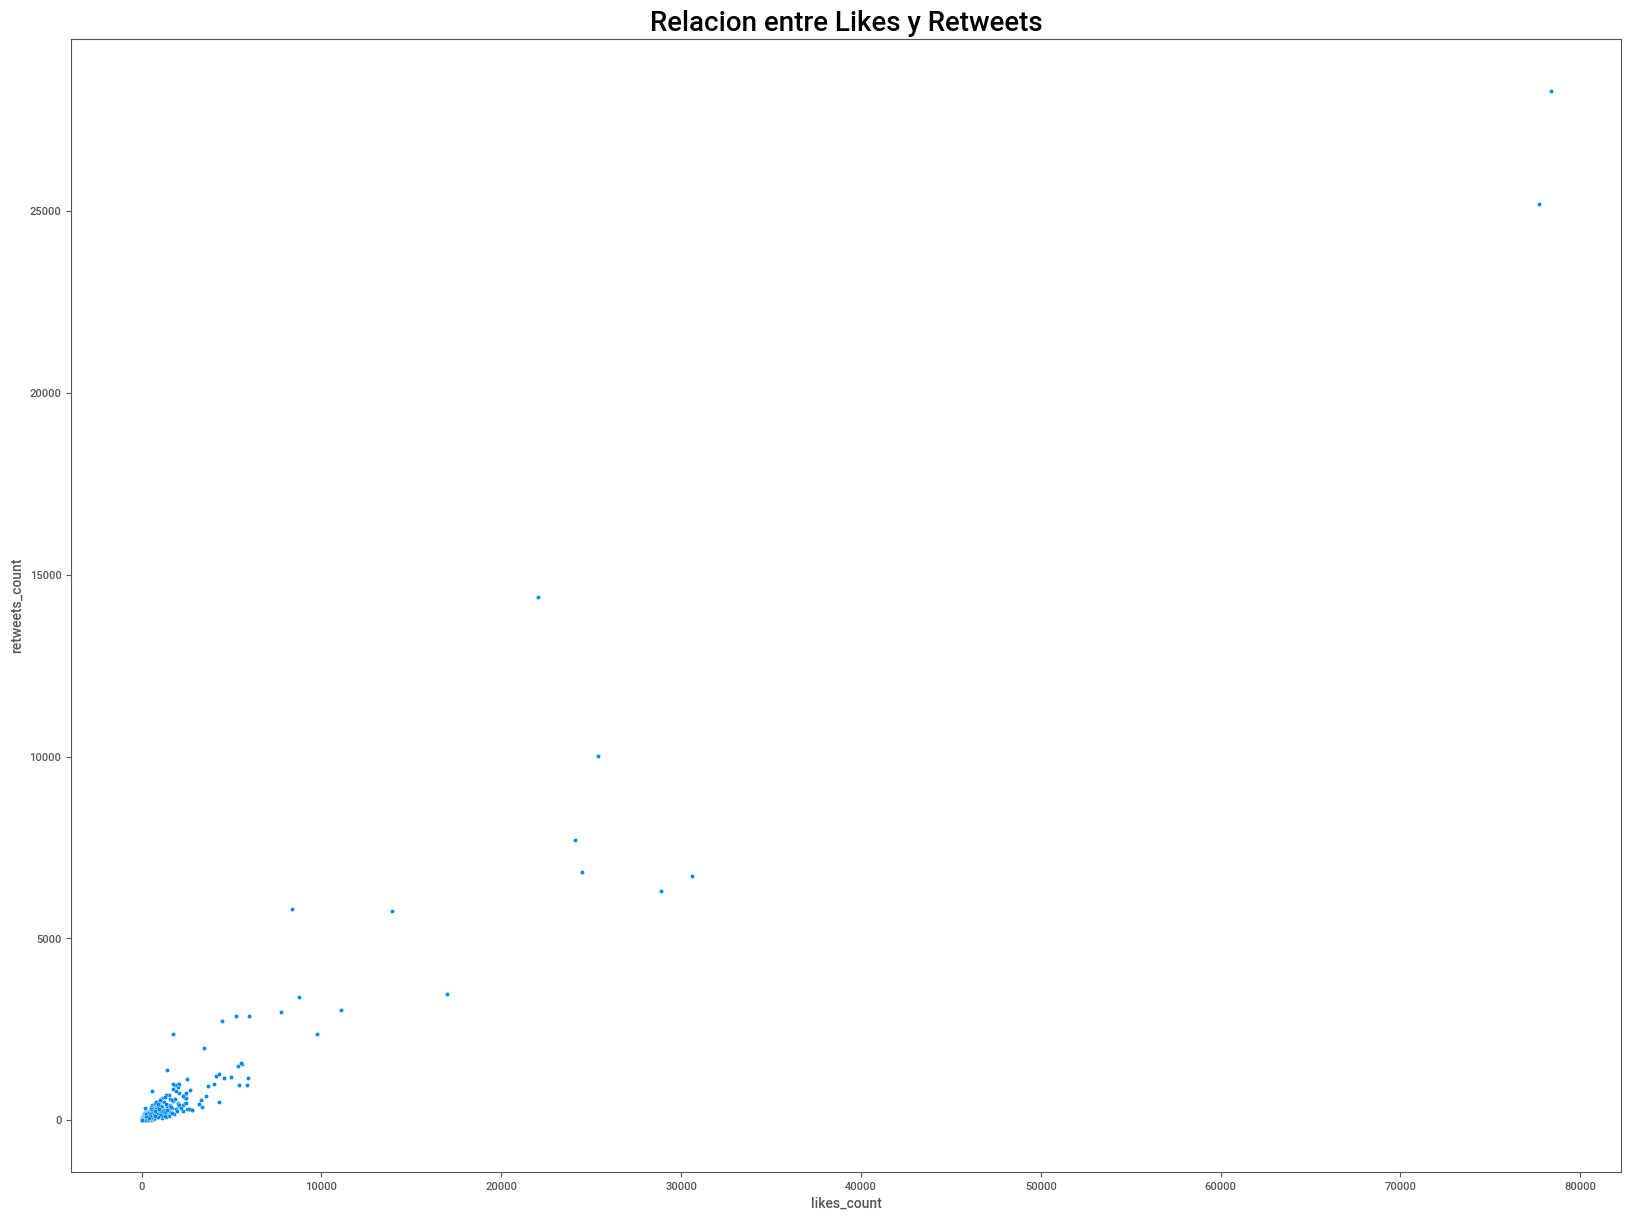

In [ ]:
#Las variables a utilizar son: likes vs retweet

sns.scatterplot(x='likes_count', y='retweets_count', data=df)
plt.title('Relacion entre Likes y Retweets', fontsize = 20, fontweight = 30)

Text(0.5, 1.0, 'Relacion entre Likes y Respuestas')

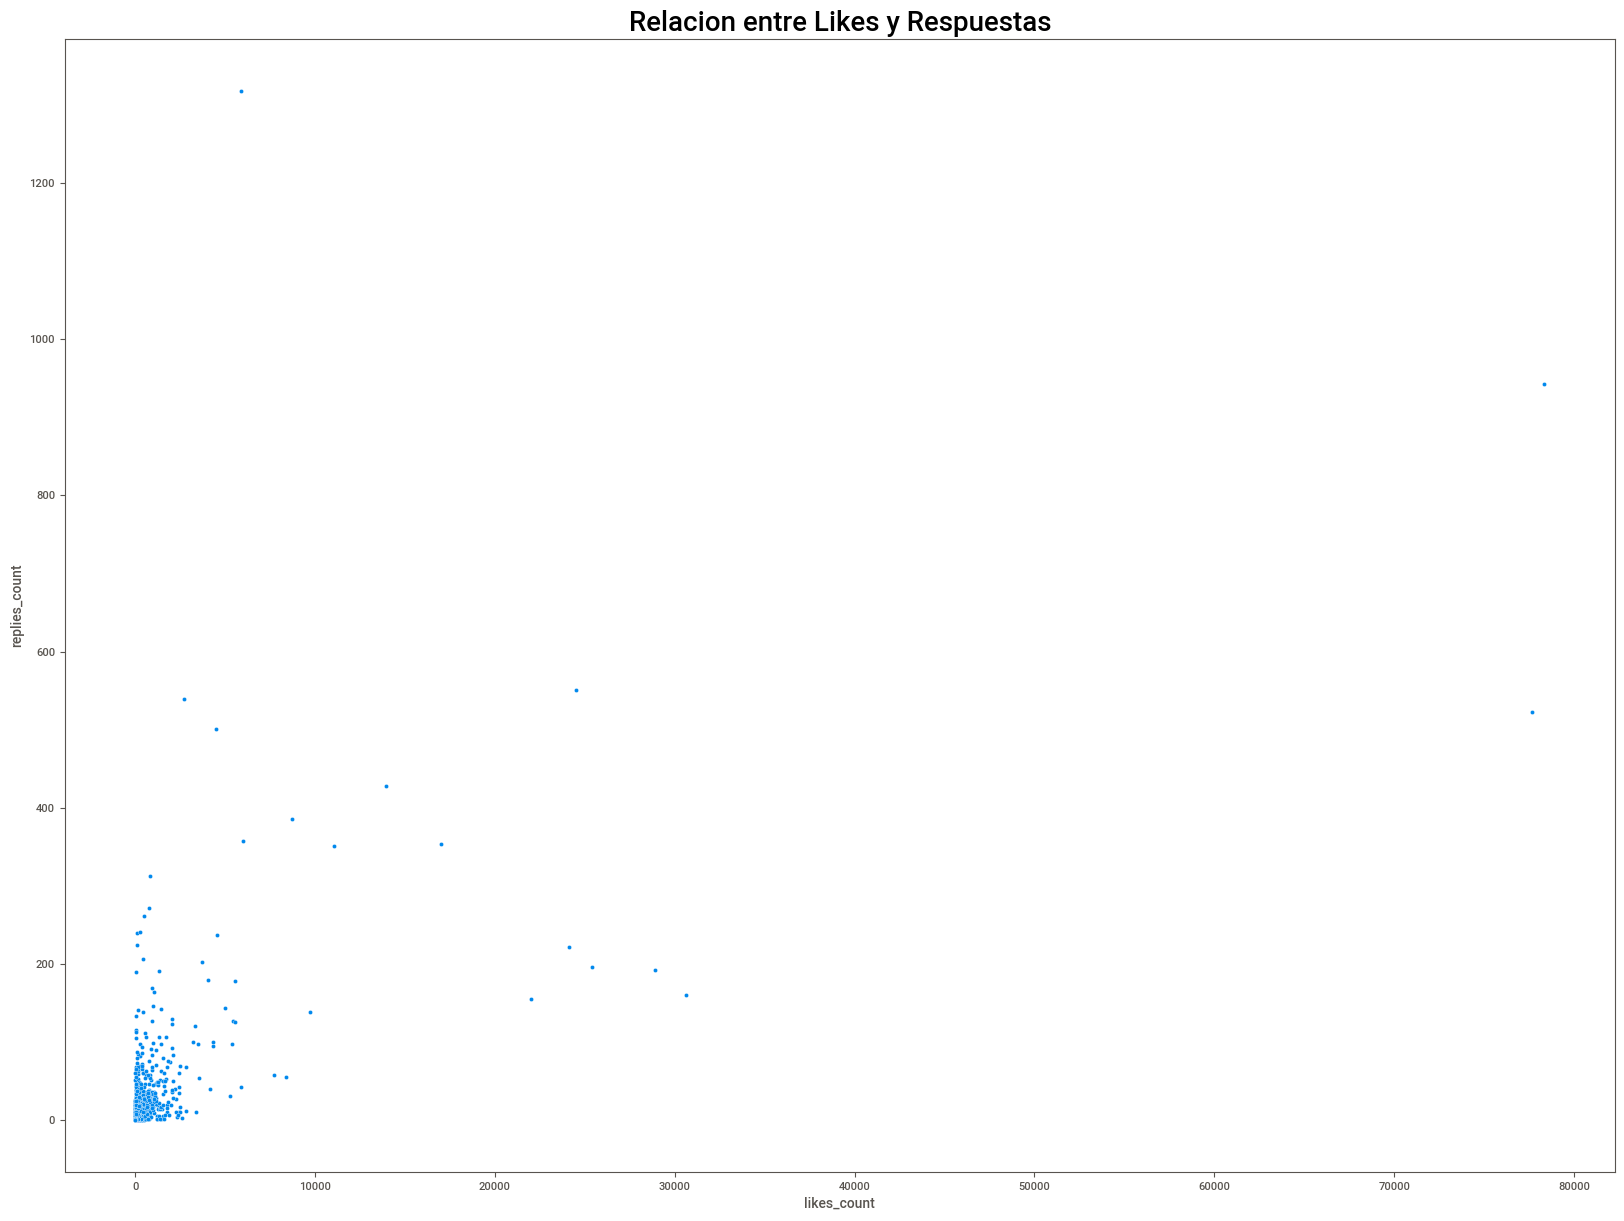

In [ ]:
#Las variables a utilizar son:  'likes_count' y 'replies_count'

sns.scatterplot(x='likes_count', y='replies_count', data=df)
plt.title('Relacion entre Likes y Respuestas', fontsize = 20, fontweight = 30)

Se puede ver en estos dos gráficos una concentración de usuarios que no llegan a número altos de likes y retweets, sin embargo hay pocos usuarios que sí alcanzan número altos: presuponemos que son "influencers" o "bots".

## Top 10 de likes por idioma

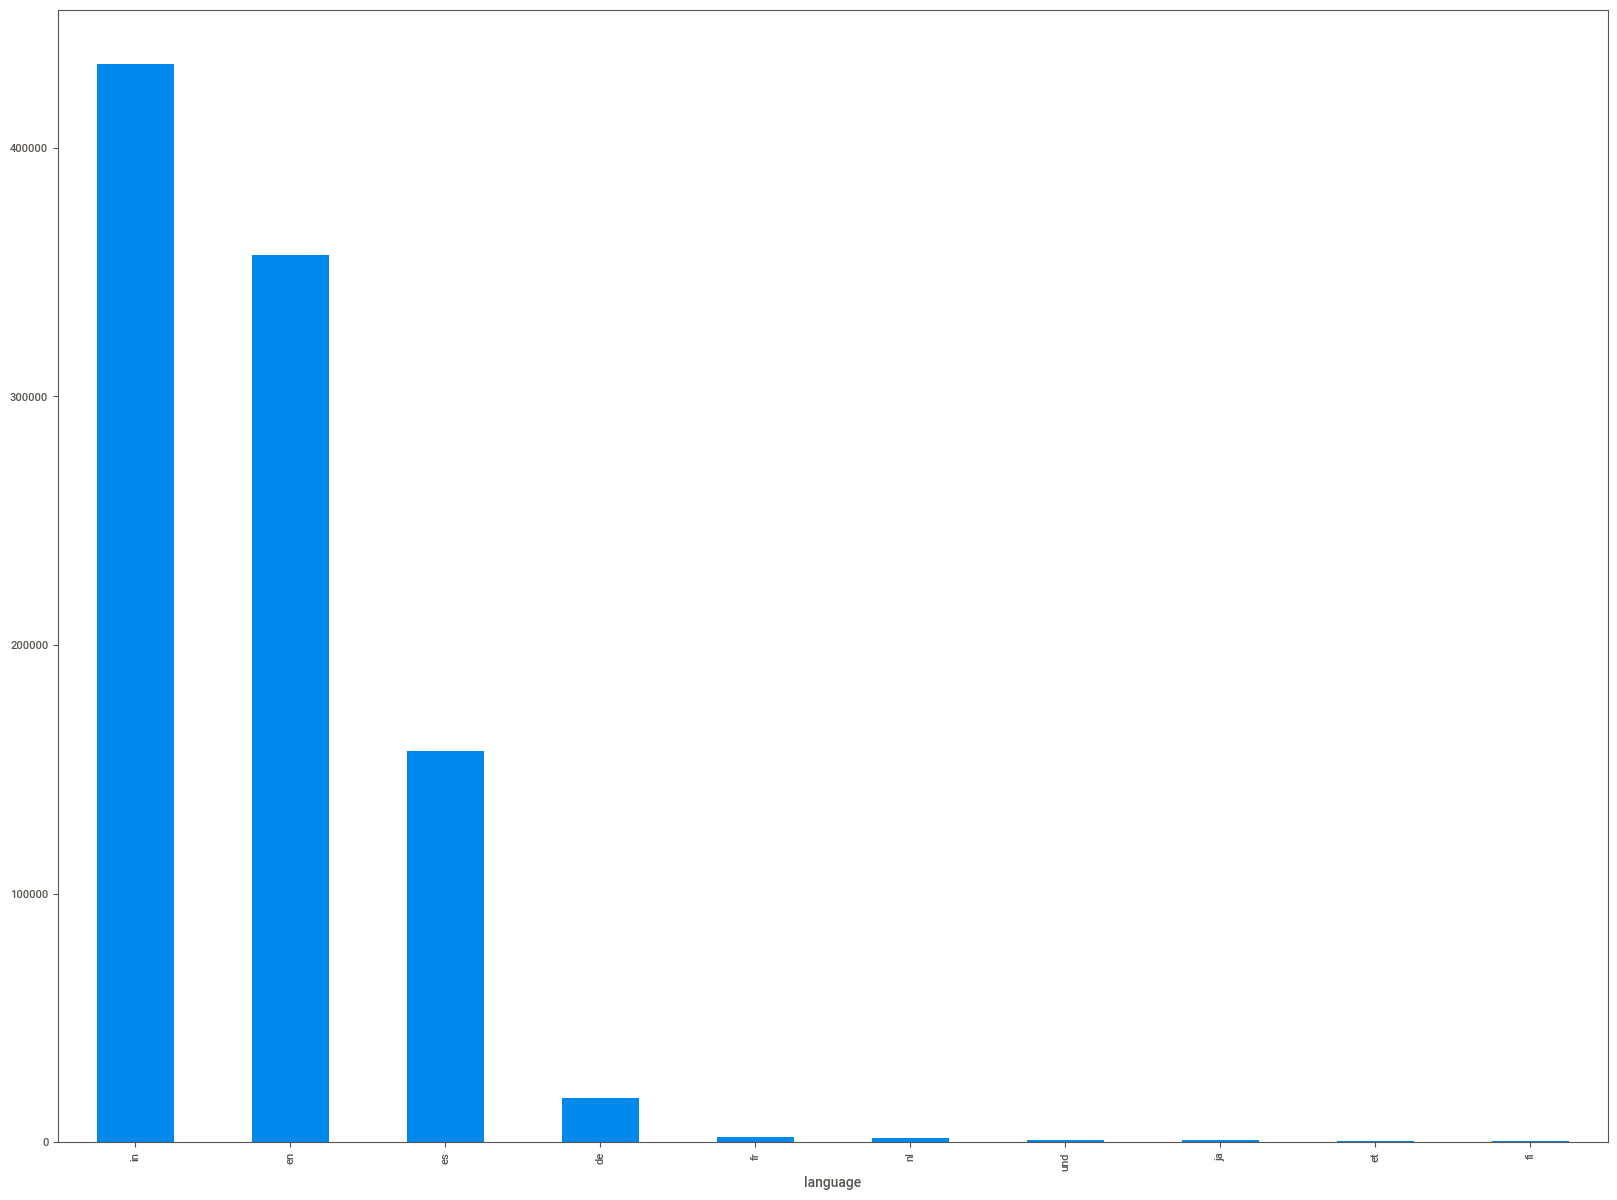

In [ ]:
# Visualizamos los idiomas con más likes

bar = df.groupby('language')['likes_count'].sum().sort_values(ascending=False)
bar = bar[:10]
ax = bar.plot.bar(x='Likes', y='Idioma', rot=90)

En este cuadro podemos ver que aunque en cantidad de tweets el ranking de plublicaciones es: inglés, español e indi (se puede ver en el html que se generó más arriba). Pero en recuento de 'likes' la primera posición es para 'indi', en segundo lugar 'inglés' y en tercer lugar 'español'.

**Análisis de usuarios:**
Intentaremos ver si hay coincidencias entre los usuarios con más likes y los usuarios que son más retweteados

# Top 10 de usuarios por likes

In [ ]:
bar3 = df.groupby('username')['likes_count'].sum().sort_values(ascending=False)

In [ ]:
# Para ver los más likeados
print(bar3[:10])

username
profesorzubairi    139112
ndrewstjan          96063
drjamesolsson       84695
kemenkesri          52746
afrkml              32156
hallidii            30616
lisa_iannattone     11801
tryangregory        11508
gab_h_r             10770
1celiagreen          9805
Name: likes_count, dtype: int64


# Top 10 de usuarios por retweets

In [ ]:
bar4 = df.groupby('username')['retweets_count'].sum().sort_values(ascending=False)

In [ ]:
print(bar4[:10])

username
profesorzubairi    43773
ndrewstjan         31984
kemenkesri         26366
drjamesolsson      21897
afrkml              7459
hallidii            6708
idai_tweets         5825
sdenta              3626
editor_76           3382
gab_h_r             3208
Name: retweets_count, dtype: int64


Podemos ver que los primeros 4 usuarios coinciden en las dos categorias, después de ellos hay cambios en el ranking.

# Vizualizamos cantidad de tweets por día

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
date = df['date'].value_counts()

In [ ]:
date.sort_index(ascending=True, inplace=True)

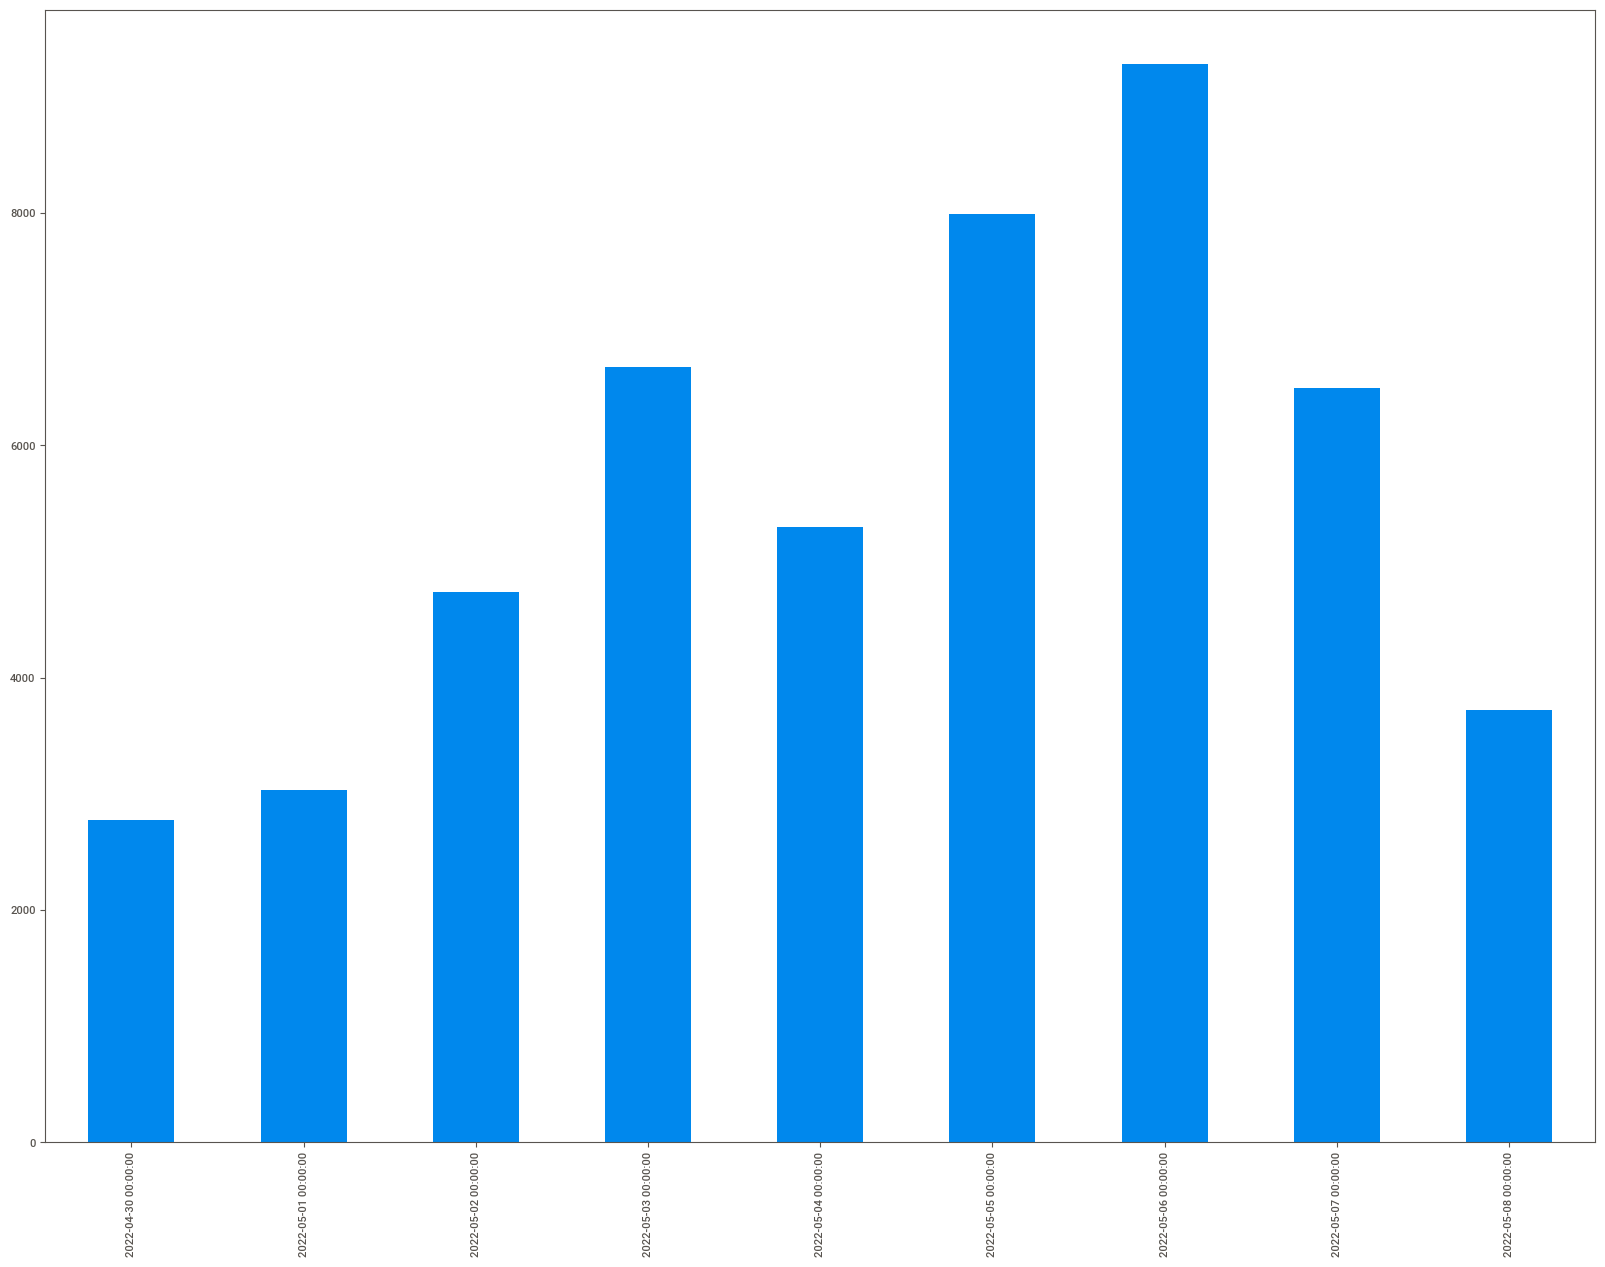

In [ ]:
ax = date.plot.bar(x='date', y='tweets', rot=90)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1678f438-dd57-41c5-b88b-bfcde7b7ccb5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>